In [ ]:
"""
TODOs:
What is the ratio of questions left answered? Len(unanswered q)/len(questions)
len(questions[questions['AnswerCount'] == 0]) / len(questions)
0.47054122630012185
What is the ratio of questions without an accepted answer?
len(unaswered) / len(questions)
0.0006393223183425569
What are some examples of interesting questions? 
List the 15 most upvoted questions that are unanswered.

Notes:
https://tinyurl.com/y9hcxglo
"""

In [39]:
import pandas as pd
from collections import Counter, defaultdict
import json
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
PATH = '/Users/John/PycharmProjects/160-Stackoverflow/source/sandbox/300000_rows/'
QUESTION = 1
ANSWER = 2
UP = 2
DOWN = 3
path = lambda x: PATH + x

In [6]:
posts = pd.read_csv(path('Posts.csv'))
votes = pd.read_csv(path('Votes.csv'))

/Users/John/Dropbox/ECS171/HW3/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
posts['ParentID'] = posts['ParentID'].fillna(0).astype(int)
posts['AcceptedAnswerId'] = posts['AcceptedAnswerId'].fillna(0).astype(int)

### What is the ratio of questions left answered?

In [13]:
questions = posts[posts['PostTypeId'] == QUESTION]
unanswered = questions[questions['AcceptedAnswerId'] == 0]
#len(questions[questions['AnswerCount'] == 0]) / len(questions)

### What is the ratio of questions without an accepted answer?

In [ ]:
len(unanswered) / len(questions)

In [ ]:
unanswered.rename(columns = {'Id':'PostId'}, inplace = True)
upvotes = votes[votes['VoteTypeId'] == UP]

In [ ]:
no_ans_q = questions[questions['AnswerCount'] == 0]
no_ans_q.rename(columns = {'Id':'PostId'}, inplace = True)
uv_no_ans = upvotes.join(no_ans_q.set_index('PostId'), on='PostId', how='inner', lsuffix='_x')

In [ ]:
# List the 15 most upvoted questions that are unanswered.
top_uv_no_ans = Counter(uv_no_ans['PostId']).most_common(15)

### List the 15 most upvoted questions that are unanswered.

In [ ]:
unanswered.sort_values(by='Score',ascending=False)[:15]

In [8]:
posts['CreationDate'] = pd.to_datetime(posts.CreationDate)
#posts.sort_values(by='CreationDate')[:10]

### What is the mean and median response for a question for each of the 20 most popular tags?
The mean and median response is the difference between when the question is asked and when the first answer is. 

In [9]:
tags = pd.read_csv('/Users/John/PycharmProjects/160-Stackoverflow/source/sandbox/tags/tag_distribution.csv')

In [10]:
top_tags = tags.sort_values(by='frequency', ascending=False)[:20]

#### Getting the time between the question is asked and the accepted answer 

In [11]:
answers = posts[posts['PostTypeId'] == ANSWER] 
def time_diff(question_row):
    answer_row = answers.loc[answers['Id'] == question_row['AcceptedAnswerId']]
    return answer_row.get_value(answer_row.index.values[0], 'CreationDate') - question_row.get_value(4)

In [14]:
questions['CreationDate'] = pd.to_datetime(questions['CreationDate'])

/Users/John/Dropbox/ECS171/HW3/venv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
answered_questions = questions[questions['AcceptedAnswerId'] != 0]
answered_questions['AcceptedAnswerTime'] = answered_questions.apply(time_diff, axis=1)

/Users/John/Dropbox/ECS171/HW3/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
/Users/John/Dropbox/ECS171/HW3/venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
tag_dict = json.load(open('/Users/John/PycharmProjects/160-Stackoverflow/source/sandbox/tag_network_load.json'))

In [33]:
# tag with accepted answer time in hours
post_by_tags = pd.DataFrame(columns=list(top_tags['tag']))
for tag in top_tags['tag']:
    rows = answered_questions.loc[posts['Id'].isin(tag_dict[tag])]
    # convert to hours
    post_by_tags[tag] = rows['AcceptedAnswerTime'].apply(lambda x: x.seconds / 3600)

In [34]:
post_by_tags.head()

,javascript,python,java,android,php,html,jquery,css,r,angular,ios,mysql,sql,swift,reactjs,json,arrays,pandas,c,django
34,0.581944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,0.114167,NaN,NaN,NaN,0.114167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,0.354444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,0.678611,NaN,NaN,NaN,NaN,NaN,0.678611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,0.176944,NaN,NaN,NaN,NaN,NaN,0.176944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
ax = sns.boxplot(data=post_by_tags, orient="v", palette="Set2")

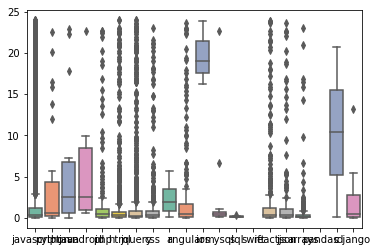

In [56]:
plt.show()

In [54]:
post_by_tags.mean()

javascript     2.208323
python         4.219416
java           5.800295
android        5.125148
php            2.041580
html           1.544077
jquery         1.955109
css            1.641979
r              2.366759
angular        2.797359
ios           19.683704
mysql          2.075850
sql            0.175389
swift               NaN
reactjs        1.923973
json           2.215604
arrays         0.774211
pandas              NaN
c             10.409167
django         2.010051
dtype: float64

In [59]:
answered_questions.loc[posts['Id'].isin(tag_dict['pandas'])]

,Id,PostTypeId,ParentID,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,LastEditorUserId,...,LastEditDate,LastActivityDate,CommunityOwnedDate,ClosedDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,AcceptedAnswerTime
118,48871018,1,0,48871150,2018-02-19 17:14:35.260,2,29.0,<p>The following DataFrame (df) has 3 columns ...,8501582.0,9209546.0,...,2018-03-02T03:51:02.887,2018-03-02T03:51:02.887,NaN,NaN,Mean of a series contained within a DataFrame,<python><pandas><dataframe><mean><series>,2.0,1,NaN,00:07:30.123000
138,48871043,1,0,48872246,2018-02-19 17:15:59.740,0,63.0,<p>I don't know whether it can be achieved or ...,6772442.0,6772442.0,...,2018-02-20T16:24:11.713,2018-02-20T16:24:11.713,NaN,NaN,How to update row by row of dataframe using py...,<python><pandas><dataframe>,1.0,5,NaN,01:19:05.860000
247,48871169,1,0,48871506,2018-02-19 17:23:17.030,1,29.0,"<p>I have two DataFrames. The first, <code>df1...",7204030.0,7204030.0,...,2018-02-19T17:48:53.467,2018-02-19T17:48:53.467,NaN,NaN,Creating a Pandas DataFrame conditional on ano...,<python><python-3.x><pandas>,1.0,3,NaN,00:19:47.383000
629,48871617,1,0,48872376,2018-02-19 17:50:48.493,4,76.0,<p>I have two <code>dataframes</code> each wit...,1506850.0,1506850.0,...,2018-02-19T18:06:15.890,2018-02-21T10:46:18.377,NaN,NaN,find closest rows between dataframes with posi...,<python><pandas><datetime>,2.0,2,NaN,00:54:03.517000
935,48871983,1,0,48872034,2018-02-19 18:16:50.730,0,23.0,<p>I have data like this </p>\r\n\r\n<pre><cod...,5453723.0,NaN,...,NaN,2018-02-19T18:27:13.330,NaN,2018-02-19T18:22:16.653,Sum a column value using multi-index pivot tab...,<python><pandas><pivot-table>,1.0,0,NaN,00:04:02.133000
1154,48872234,1,0,48872281,2018-02-19 18:34:11.807,2,83.0,<p>I'm trying to infer a classification accord...,5606352.0,472495.0,...,2018-03-05T22:16:23.707,2018-03-05T22:16:23.707,NaN,NaN,Using Apply in Pandas Lambda functions with mu...,<python><pandas><if-statement><lambda><apply>,3.0,4,NaN,00:03:12.453000
1395,48872516,1,0,48872685,2018-02-19 18:55:43.610,0,43.0,<p>I am working on data comparison project. He...,7521618.0,7386332.0,...,2018-02-19T18:57:28.997,2018-02-19T19:36:59.767,NaN,NaN,Compare 2 dataframes imported from excel,<python><excel><pandas><dataframe>,2.0,5,NaN,00:13:03.393000
1529,48872674,1,0,48873088,2018-02-19 19:08:02.303,0,22.0,"<p>I have a dataframe, it has many timestamps,...",7970965.0,7970965.0,...,2018-02-19T19:15:18.637,2018-02-19T19:39:33.993,NaN,NaN,Pandas - Lower of Dates when not null,<python><pandas><date>,1.0,2,NaN,00:31:31.690000
1835,48873035,1,0,48873187,2018-02-19 19:36:06.153,1,27.0,<p>I have a pandas groupby object that I made ...,8333709.0,7386332.0,...,2018-02-19T19:54:29.067,2018-02-19T19:54:29.067,NaN,NaN,Addition with nested columns in python,<python><pandas><data-science><pandas-groupby>,1.0,0,NaN,00:11:58.390000
1859,48873064,1,0,48873142,2018-02-19 19:37:45.913,3,44.0,<p>I am attempting to parse Storm Data from NO...,7564704.0,NaN,...,NaN,2018-02-21T22:36:30.447,NaN,2018-02-19T19:54:32.927,convert a pandas series in a DataFrame from a ...,<python><python-3.x><pandas>,1.0,2,NaN,00:07:20.274000
